# Speaker Vector

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/speaker-vector](https://github.com/huseinzol05/malaya-speech/tree/master/example/speaker-vector).
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
from malaya_speech import Pipeline
import malaya_speech
import numpy as np

### List available deep model

In [2]:
malaya_speech.speaker_vector.available_model()

,Size (MB),Embedding Size,EER
vggvox-v1,70.8,1024.0,0.1407
vggvox-v2,31.1,512.0,0.0445


**Smaller EER the better model is**.

### Load deep model

In [3]:
model = malaya_speech.speaker_vector.deep_model()

In [5]:
from glob import glob

speakers = glob('speech/example-speaker/*.wav')
speakers

['speech/example-speaker/khalil-nooh.wav',
 'speech/example-speaker/mas-aisyah.wav',
 'speech/example-speaker/shafiqah-idayu.wav',
 'speech/example-speaker/husein-zolkepli.wav']

### Pipeline

In [6]:
def load_wav(file):
    return malaya_speech.utils.read.wav(file)[0]

p = Pipeline()
frame = (
    p.foreach_map(load_wav)
    .foreach_map(malaya_speech.utils.astype.int_to_float)
    .map(model)
)

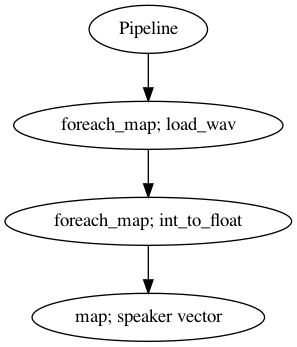

In [7]:
p.visualize()

In [8]:
r = p.emit(speakers)

### Calculate similarity

In [10]:
from scipy.spatial.distance import cdist

cdist(r['speaker-vector'], r['speaker-vector'], metric = 'cosine')

array([[0.        , 0.33648933, 0.42408386, 0.20671591],
       [0.33648933, 0.        , 0.28332642, 0.36334662],
       [0.42408386, 0.28332642, 0.        , 0.42754017],
       [0.20671591, 0.36334662, 0.42754017, 0.        ]])

Remember, our files are,

```python
['speech/example-speaker/khalil-nooh.wav',
 'speech/example-speaker/mas-aisyah.wav',
 'speech/example-speaker/shafiqah-idayu.wav',
 'speech/example-speaker/husein-zolkepli.wav']
```

If we check first row,

```python
[0.        , 0.33648933, 0.42408386, 0.20671591]
```

second smallest is `0.23006316`, which is 4th column, for `husein-zolkepli.wav`. So the speaker vector knows `khalil-nooh.wav` sounds similar to `husein-zolkepli.wav` due to gender factor.